In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df  = pd.read_csv('finance_data.csv')

In [3]:
df.head()

,date,amount,category,type
0,2020-01-01,1387.850882,salary,income
1,2020-01-02,31.909706,shopping,expense
2,2020-01-03,43.938141,food,expense
3,2020-01-04,37.233123,entertainment,expense
4,2020-01-05,23.772545,food,expense


In [4]:
df.describe()

,amount
count,1461.000000
mean,119.434679
std,380.883081
min,0.000000
25%,37.112261
50%,51.727351
75%,65.671661
max,3279.099643


In [5]:

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and year from date
df['month'] = df['date'].dt.to_period('M')

# Group by month and category, and calculate total spending
monthly_spending = df.groupby(['month', 'category'])['amount'].sum().reset_index()

# Pivot the dataset to make categories as columns
pivot_df = monthly_spending.pivot(index='month', columns='category', values='amount')

# Fill missing values with 0 (for months with no spending in a category)
pivot_df = pivot_df.fillna(0)

# Reset index to make 'month' a column
pivot_df = pivot_df.reset_index()


In [6]:
pivot_df['salary'].isnull().sum()
median_salary = pivot_df['salary'].replace(0.000, np.nan).median()
pivot_df['salary'] = pivot_df['salary'].replace(0.000, median_salary).fillna(median_salary)


In [7]:
pivot_df.tail()

category,month,entertainment,food,salary,shopping,transport
43,2023-08,559.051104,380.819361,1773.385975,465.040455,136.320540
44,2023-09,622.269959,278.838829,2348.193724,220.111698,263.996146
45,2023-10,327.811405,162.711631,2477.652604,287.080718,623.215317
46,2023-11,409.819149,305.275245,2044.203443,341.746574,294.926463
47,2023-12,392.298271,473.434778,2738.765041,263.873960,398.942154


In [8]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   month          48 non-null     period[M]
 1   entertainment  48 non-null     float64  
 2   food           48 non-null     float64  
 3   salary         48 non-null     float64  
 4   shopping       48 non-null     float64  
 5   transport      48 non-null     float64  
dtypes: float64(5), period[M](1)
memory usage: 2.4 KB


In [9]:
# Define budget ratios
budget_ratios = {
    'entertainment': 0.1,  # 10% of salary
    'food': 0.3,          # 30% of salary
    'shopping': 0.1,      # 10% of salary
    'transport': 0.2,     # 20% of salary
    'savings': 0.3        # 30% of salary
}

# Calculate budget for each category
for category, ratio in budget_ratios.items():
    pivot_df[f'{category}_budget'] = pivot_df['salary'] * ratio

# Calculate total spending for each month
pivot_df['total_spending'] = pivot_df[['entertainment', 'food', 'shopping', 'transport']].sum(axis=1)

# Calculate savings
pivot_df['savings'] = pivot_df['salary'] - pivot_df['total_spending']

# Display the updated dataset
print(pivot_df.head())

category    month  entertainment        food       salary    shopping  \
0         2020-01     213.968006  256.018141  3283.339253  346.877733   
1         2020-02     214.628057  511.294566  2197.335765  341.803674   
2         2020-03     294.615539  235.743611  3284.478048  496.549872   
3         2020-04     400.243233  365.791982  2294.289202  450.553892   
4         2020-05     242.130602  289.059747  2834.952252  570.089819   

category   transport  entertainment_budget  food_budget  shopping_budget  \
0         448.749493            328.333925   985.001776       328.333925   
1         490.186852            219.733576   659.200729       219.733576   
2         475.344517            328.447805   985.343414       328.447805   
3         204.971088            229.428920   688.286761       229.428920   
4         386.402994            283.495225   850.485676       283.495225   

category  transport_budget  savings_budget  total_spending      savings  
0               656.667851    

In [10]:
pivot_df.head()

category,month,entertainment,food,salary,shopping,transport,entertainment_budget,food_budget,shopping_budget,transport_budget,savings_budget,total_spending,savings
0,2020-01,213.968006,256.018141,3283.339253,346.877733,448.749493,328.333925,985.001776,328.333925,656.667851,985.001776,1265.613374,2017.725880
1,2020-02,214.628057,511.294566,2197.335765,341.803674,490.186852,219.733576,659.200729,219.733576,439.467153,659.200729,1557.913149,639.422616
2,2020-03,294.615539,235.743611,3284.478048,496.549872,475.344517,328.447805,985.343414,328.447805,656.895610,985.343414,1502.253539,1782.224509
3,2020-04,400.243233,365.791982,2294.289202,450.553892,204.971088,229.428920,688.286761,229.428920,458.857840,688.286761,1421.560195,872.729007
4,2020-05,242.130602,289.059747,2834.952252,570.089819,386.402994,283.495225,850.485676,283.495225,566.990450,850.485676,1487.683162,1347.269090


In [11]:
pivot_df['entertainment_budget_exceeded'] = (pivot_df['entertainment'] > pivot_df['entertainment_budget']).astype(int)
pivot_df['food_budget_exceeded'] = (pivot_df['food'] > pivot_df['food_budget']).astype(int)
pivot_df['shopping_budget_exceeded'] = (pivot_df['shopping'] > pivot_df['shopping_budget']).astype(int)
pivot_df['transport_budget_exceeded'] = (pivot_df['transport'] > pivot_df['transport_budget']).astype(int)

In [12]:
pivot_df.head() 

category,month,entertainment,food,salary,shopping,transport,entertainment_budget,food_budget,shopping_budget,transport_budget,savings_budget,total_spending,savings,entertainment_budget_exceeded,food_budget_exceeded,shopping_budget_exceeded,transport_budget_exceeded
0,2020-01,213.968006,256.018141,3283.339253,346.877733,448.749493,328.333925,985.001776,328.333925,656.667851,985.001776,1265.613374,2017.725880,0,0,1,0
1,2020-02,214.628057,511.294566,2197.335765,341.803674,490.186852,219.733576,659.200729,219.733576,439.467153,659.200729,1557.913149,639.422616,0,0,1,1
2,2020-03,294.615539,235.743611,3284.478048,496.549872,475.344517,328.447805,985.343414,328.447805,656.895610,985.343414,1502.253539,1782.224509,0,0,1,0
3,2020-04,400.243233,365.791982,2294.289202,450.553892,204.971088,229.428920,688.286761,229.428920,458.857840,688.286761,1421.560195,872.729007,1,0,1,0
4,2020-05,242.130602,289.059747,2834.952252,570.089819,386.402994,283.495225,850.485676,283.495225,566.990450,850.485676,1487.683162,1347.269090,0,0,1,0


In [13]:
pivot_df.columns = pivot_df.columns.str.strip().str.lower()  # Clean and lowercase column names
print(pivot_df.columns)  # Verify changes


Index(['month', 'entertainment', 'food', 'salary', 'shopping', 'transport',
       'entertainment_budget', 'food_budget', 'shopping_budget',
       'transport_budget', 'savings_budget', 'total_spending', 'savings',
       'entertainment_budget_exceeded', 'food_budget_exceeded',
       'shopping_budget_exceeded', 'transport_budget_exceeded'],
      dtype='object', name='category')


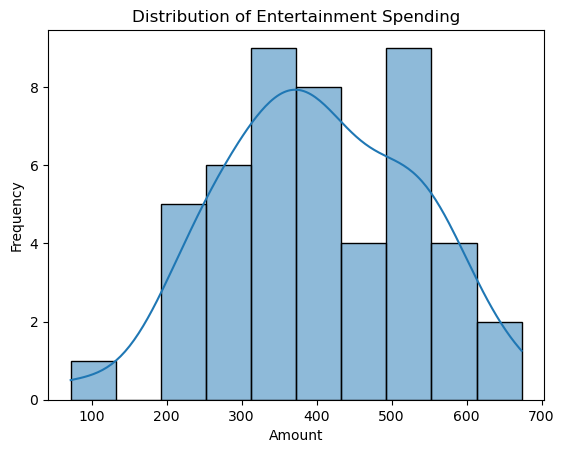

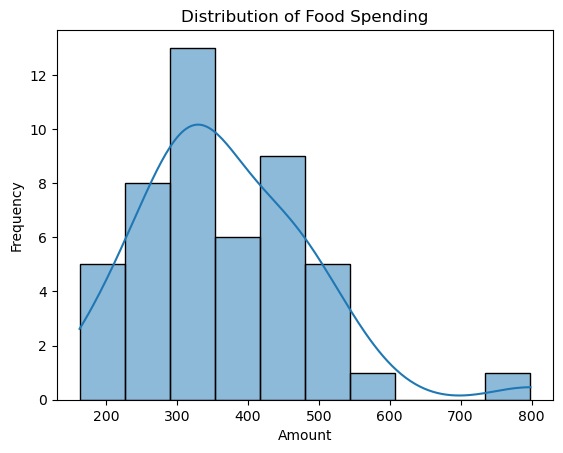

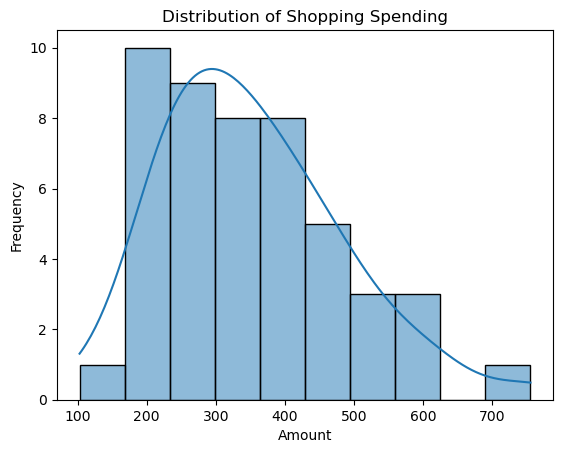

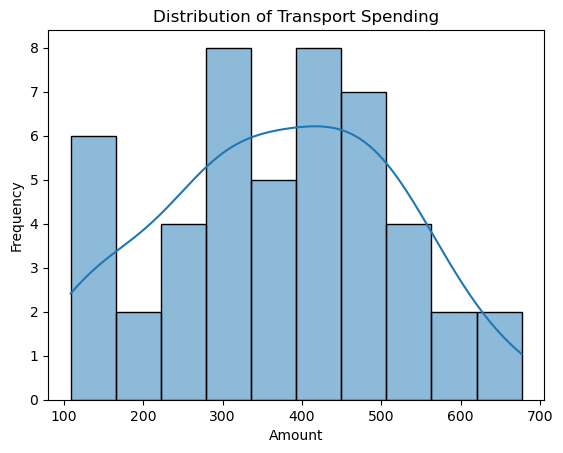

In [14]:
##Distrubution of spending
categories = ['entertainment', 'food', 'shopping', 'transport']
for category in categories:
    data = pivot_df.get(category)
    if data is not None:
        sns.histplot(data, bins=10, kde=True)
        plt.title(f'Distribution of {category.capitalize()} Spending')
        plt.xlabel('Amount')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column '{category}' not found!")


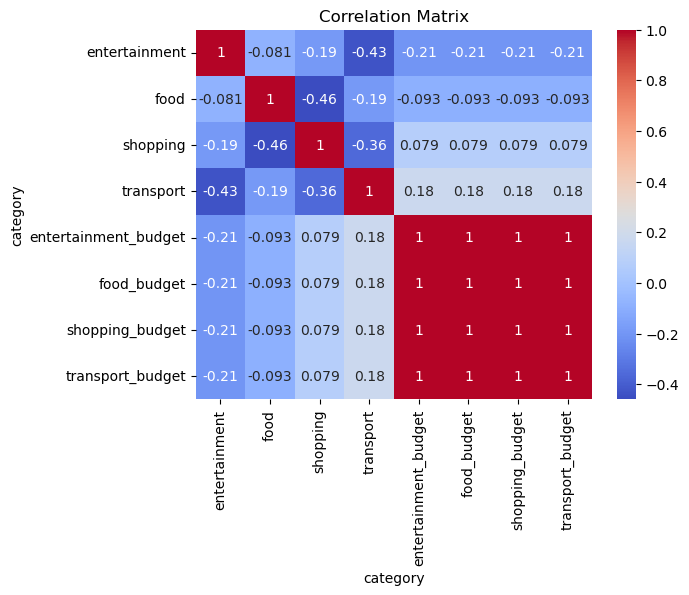

In [15]:
# Correlation matrix
corr_matrix = pivot_df[['entertainment', 'food', 'shopping', 'transport', 'entertainment_budget', 'food_budget', 'shopping_budget', 'transport_budget']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

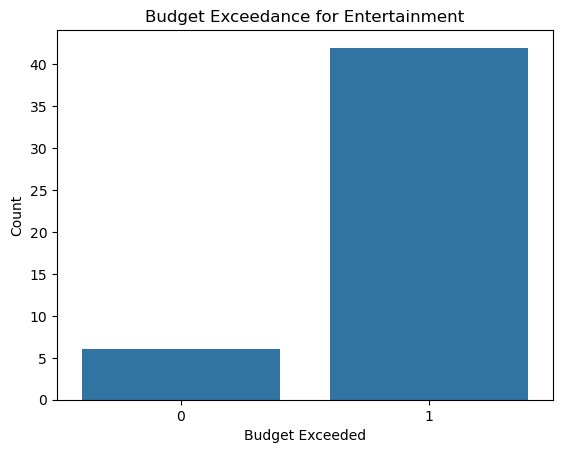

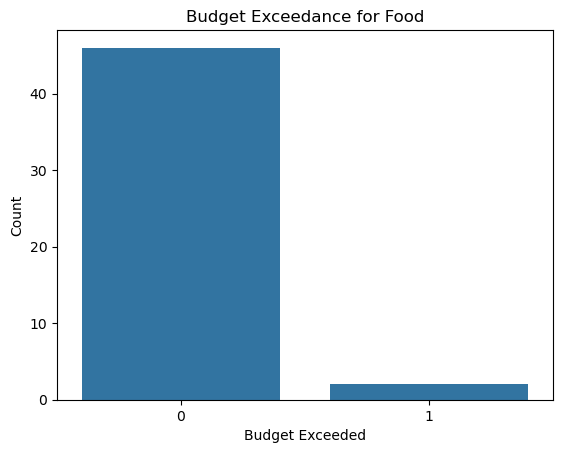

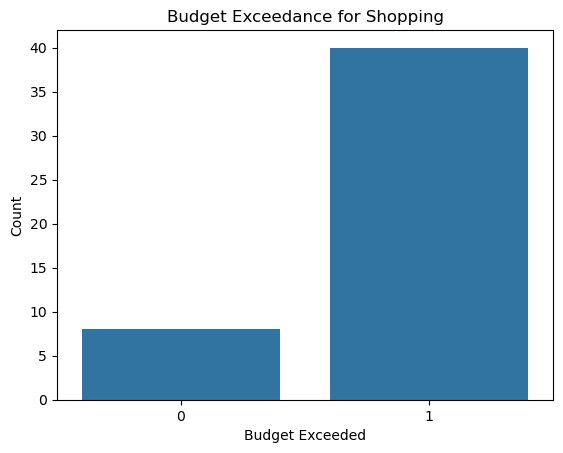

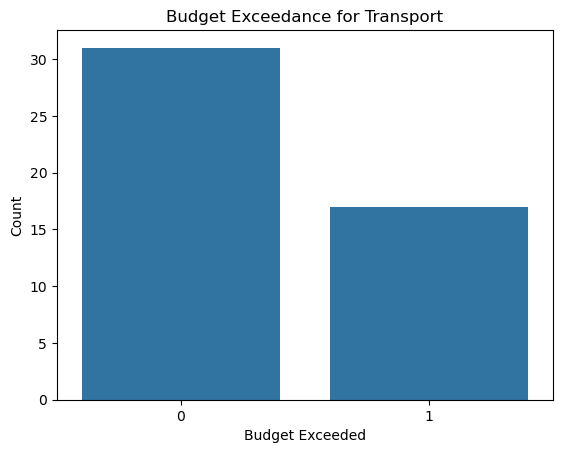

In [16]:
# Budget exceedance analysis
budget_exceedance_columns = ['entertainment_budget_exceeded', 'food_budget_exceeded', 'shopping_budget_exceeded', 'transport_budget_exceeded']
for column in budget_exceedance_columns:
    sns.countplot(x=column, data=pivot_df)
    plt.title(f'Budget Exceedance for {column.split("_")[0].capitalize()}')
    plt.xlabel('Budget Exceeded')
    plt.ylabel('Count')
    plt.show()

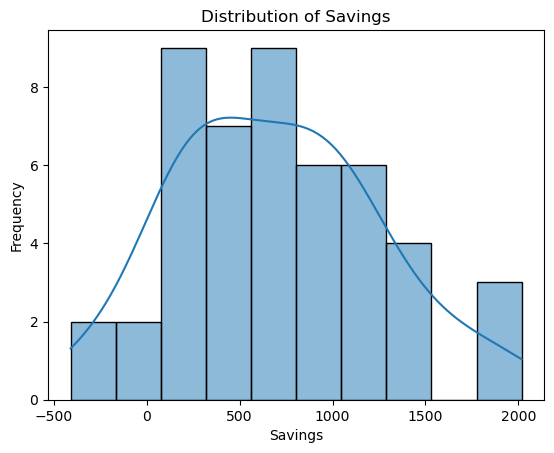

In [17]:
# Distribution of savings
sns.histplot(pivot_df['savings'], bins=10, kde=True)
plt.title('Distribution of Savings')
plt.xlabel('Savings')
plt.ylabel('Frequency')
plt.show()

Dataset info:
Shape: (48, 17)

Columns: ['month', 'entertainment', 'food', 'salary', 'shopping', 'transport', 'entertainment_budget', 'food_budget', 'shopping_budget', 'transport_budget', 'savings_budget', 'total_spending', 'savings', 'entertainment_budget_exceeded', 'food_budget_exceeded', 'shopping_budget_exceeded', 'transport_budget_exceeded']

Sample of the dataset:
category    month  entertainment        food       salary    shopping  \
0         2020-01     213.968006  256.018141  3283.339253  346.877733   
1         2020-02     214.628057  511.294566  2197.335765  341.803674   
2         2020-03     294.615539  235.743611  3284.478048  496.549872   
3         2020-04     400.243233  365.791982  2294.289202  450.553892   
4         2020-05     242.130602  289.059747  2834.952252  570.089819   

category   transport  entertainment_budget  food_budget  shopping_budget  \
0         448.749493            328.333925   985.001776       328.333925   
1         490.186852            219.

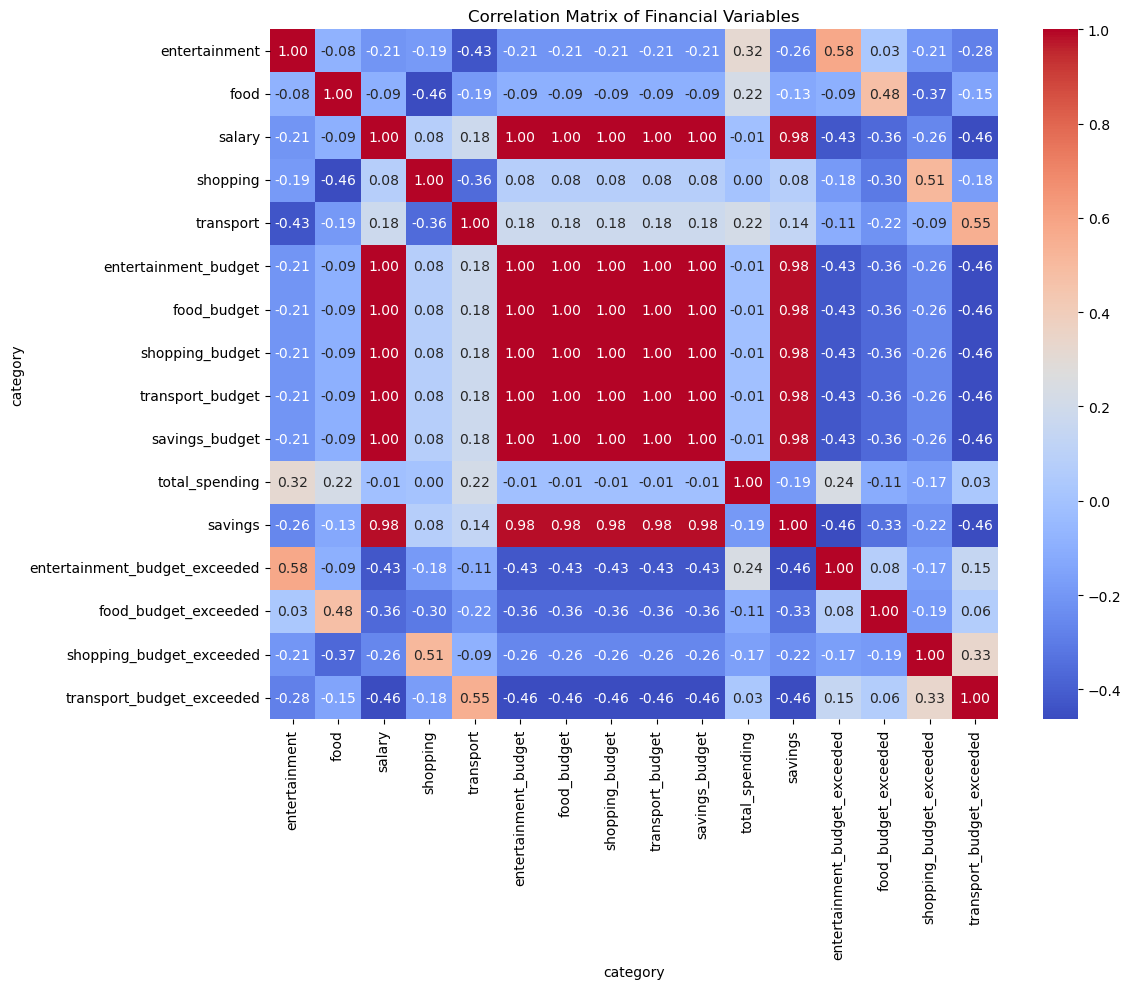

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# We'll use your existing pivot_df instead of generating sample data
# Assuming pivot_df is already defined and contains all required columns

# Make a copy of the dataframe to avoid modifying the original
df = pivot_df.copy()

# Check if required columns exist, if not, we'll need to calculate them
required_columns = ['entertainment_budget_exceeded', 'food_budget_exceeded', 
                    'shopping_budget_exceeded', 'transport_budget_exceeded']

for col in required_columns:
    if col not in df.columns:
        # Extract category name from column name
        category = col.replace('_budget_exceeded', '')
        # Create budget exceeded flag (1 if exceeded, 0 otherwise)
        if f'{category}' in df.columns and f'{category}_budget' in df.columns:
            df[col] = (df[category] > df[f'{category}_budget']).astype(int)

# Create a copy for time series analysis with month as index
df_ts = df.copy()
if 'month' in df.columns:
    # Convert month to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['month']):
        try:
            df_ts['month'] = pd.to_datetime(df_ts['month'])
        except:
            # If conversion fails, we'll leave it as is
            pass
    df_ts.set_index('month', inplace=True)

# Display basic information about the dataset
print("Dataset info:")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nSample of the dataset:")
print(df.head())

# Let's analyze the dataset
print("\nBasic statistics:")
print(df.describe())

# Check correlations
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Financial Variables')
plt.tight_layout()
plt.show()

In [26]:
# 1. Predict total spending based on individual category spending
def train_spending_model():
    # Check if all required columns exist
    required_features = ['entertainment', 'food', 'shopping', 'transport', 'total_spending']
    missing_cols = [col for col in required_features if col not in df.columns]
    
    if missing_cols:
        print(f"Warning: Missing columns: {missing_cols}")
        return None
    
    X = df[['entertainment', 'food', 'shopping', 'transport']]
    y = df['total_spending']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression model (simple baseline)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_mse = mean_squared_error(y_test, lr_pred)
    lr_r2 = r2_score(y_test, lr_pred)
    
    print("\n1. Total Spending Prediction Model:")
    print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.4f}")
    
    # Random Forest model (more complex)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    
    print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.4f}")
    
    # Feature importance
    plt.figure(figsize=(10, 6))
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.title('Feature Importance for Total Spending Prediction')
    plt.show()
    
    return rf_model if rf_r2 > lr_r2 else lr_model  # Return the better model

In [20]:
# 2. Predict whether a person will exceed their budget in a specific category
def train_budget_exceeded_models():
    categories = ['entertainment', 'food', 'shopping', 'transport']
    models = {}
    
    for category in categories:
        budget_flag = f'{category}_budget_exceeded'
        
        # Check if all required columns exist
        if budget_flag not in df.columns or category not in df.columns:
            print(f"Warning: Missing columns for {category} budget prediction")
            continue
        
        print(f"\n2. Budget Exceeded Prediction for {category}:")
        
        # Features: salary (if available) and other spending categories
        features = []
        if 'salary' in df.columns:
            features.append('salary')
        
        # Add other categories as features
        features += [c for c in categories if c != category and c in df.columns]
        
        # Add budget as a feature
        budget_col = f'{category}_budget'
        if budget_col in df.columns:
            features.append(budget_col)
            
        if not features:
            print(f"No valid features for {category} budget prediction")
            continue
            
        X = df[features]
        y = df[budget_flag]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Logistic Regression
        logreg = LogisticRegression(random_state=42, max_iter=1000)
        logreg.fit(X_train_scaled, y_train)
        logreg_pred = logreg.predict(X_test_scaled)
        logreg_acc = accuracy_score(y_test, logreg_pred)
        
        print(f"Logistic Regression - Accuracy: {logreg_acc:.4f}")
        print(classification_report(y_test, logreg_pred))
        
        # Random Forest
        rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_clf.fit(X_train, y_train)
        rf_pred = rf_clf.predict(X_test)
        rf_acc = accuracy_score(y_test, rf_pred)
        
        print(f"Random Forest - Accuracy: {rf_acc:.4f}")
        print(classification_report(y_test, rf_pred))
        
        # Feature importance for Random Forest
        if len(features) > 1:
            plt.figure(figsize=(10, 6))
            importances = rf_clf.feature_importances_
            indices = np.argsort(importances)
            plt.barh(range(len(indices)), importances[indices], align='center')
            plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
            plt.title(f'Feature Importance for {category.capitalize()} Budget Prediction')
            plt.show()
        
        # Store the better model
        if rf_acc > logreg_acc:
            models[category] = {
                'model': rf_clf,
                'features': features,
                'scaler': None
            }
        else:
            models[category] = {
                'model': logreg,
                'features': features,
                'scaler': scaler
            }
    
    return models


In [27]:
# 3. Forecast future spending in each category based on historical patterns
def train_forecast_models():
    forecast_models = {}
    categories = ['entertainment', 'food', 'shopping', 'transport']
    
    print("\n3. Time Series Forecasting Models:")
    
    # Check if df_ts has a datetime index
    has_datetime_index = isinstance(df_ts.index, pd.DatetimeIndex)
    
    if not has_datetime_index:
        print("Warning: Month column is not a datetime index. Time series forecasting may not be accurate.")
        print("Converting to a sequential index for demonstration.")
        # Create a sequential index for demonstration
        for category in [c for c in categories if c in df_ts.columns]:
            series = df_ts[category]
            
            # Set up simple AR model (not a true time series model without dates)
            model = ARIMA(series, order=(1, 0, 0))
            try:
                model_fit = model.fit()
                # Make predictions for next 3 periods
                forecast = model_fit.forecast(steps=3)
                
                print(f"\n{category.capitalize()} forecast for next 3 periods:")
                for i, value in enumerate(forecast):
                    print(f"Period {i+1}: ${value:.2f}")
                
                forecast_models[category] = model_fit
            except Exception as e:
                print(f"Error fitting ARIMA model for {category}: {e}")
    else:
        # We have a proper datetime index
        for category in [c for c in categories if c in df_ts.columns]:
            # Extract time series for the category
            series = df_ts[category]
            
            # Fit ARIMA model
            # (p,d,q) parameters would need to be optimized for real data
            try:
                model = ARIMA(series, order=(1, 1, 1))
                model_fit = model.fit()
                
                # Make predictions for next 3 months
                forecast = model_fit.forecast(steps=3)
                
                print(f"\n{category.capitalize()} forecast for next 3 months:")
                for i, value in enumerate(forecast):
                    print(f"Month {i+1}: ${value:.2f}")
                
                # Plot actual vs forecast
                plt.figure(figsize=(10, 6))
                plt.plot(series, label='Actual')
                
                # Plot the forecast with a different color
                forecast_index = pd.date_range(start=series.index[-1], periods=4, freq='M')[1:]
                plt.plot(forecast_index, forecast, 'r--', label='Forecast')
                
                plt.title(f'{category.capitalize()} Spending Forecast')
                plt.legend()
                plt.grid(True)
                plt.show()
                
                forecast_models[category] = model_fit
            except Exception as e:
                print(f"Error fitting ARIMA model for {category}: {e}")
    
    return forecast_models



Training all models...

1. Total Spending Prediction Model:
Linear Regression - MSE: 0.00, R²: 1.0000
Random Forest - MSE: 14548.46, R²: -0.3145


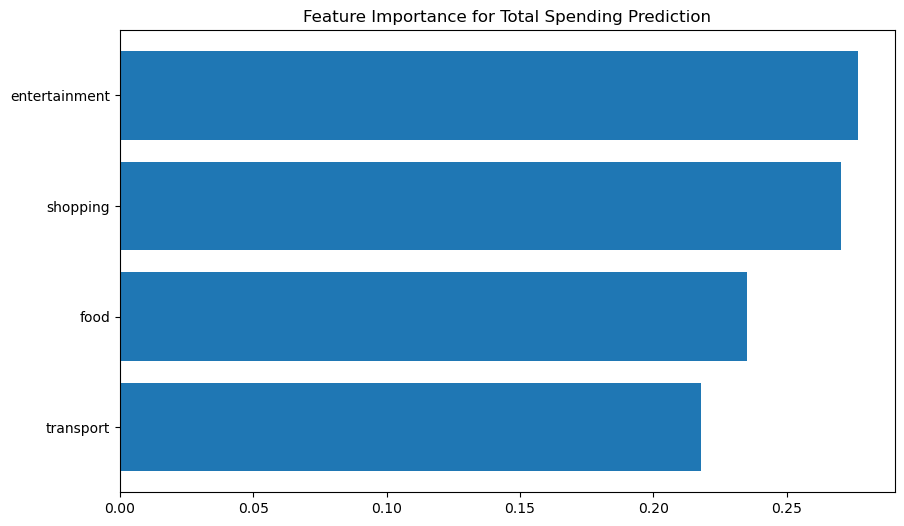


2. Budget Exceeded Prediction for entertainment:
Logistic Regression - Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10

Random Forest - Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



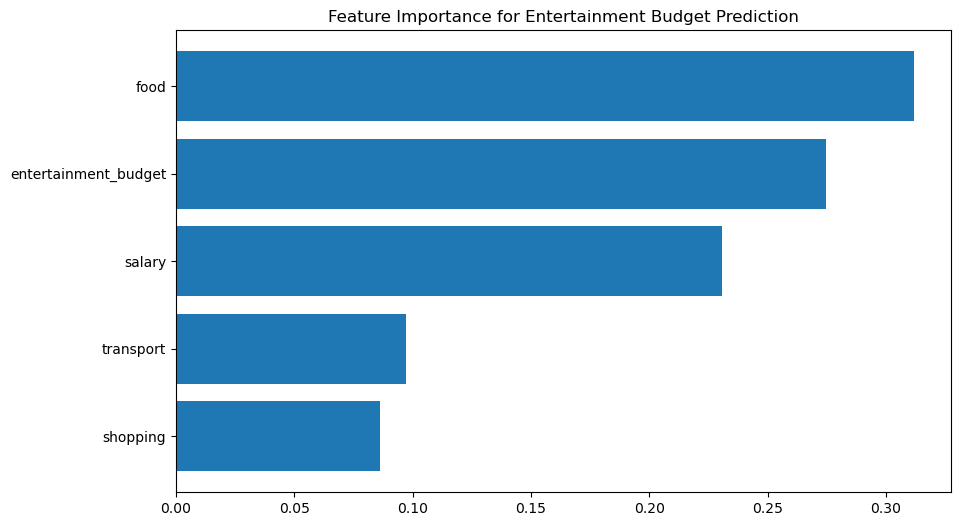


2. Budget Exceeded Prediction for food:
Logistic Regression - Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Random Forest - Accuracy: 0.8000
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.33      1.00      0.50         1

    accuracy                           0.80        10
   macro avg       0.67      0.89      0.69        10
weighted avg       0.93      0.80      0.84        10



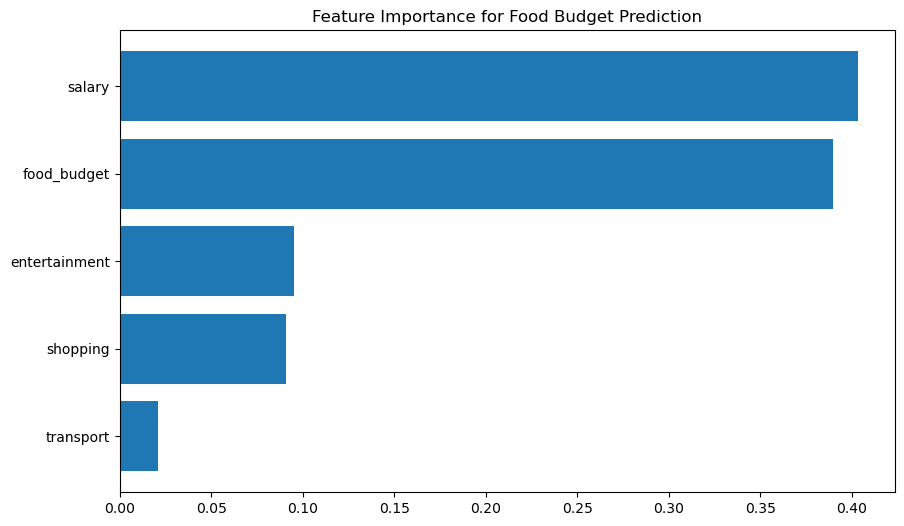


2. Budget Exceeded Prediction for shopping:
Logistic Regression - Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.89      0.89         9

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10

Random Forest - Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.89      0.89         9

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10



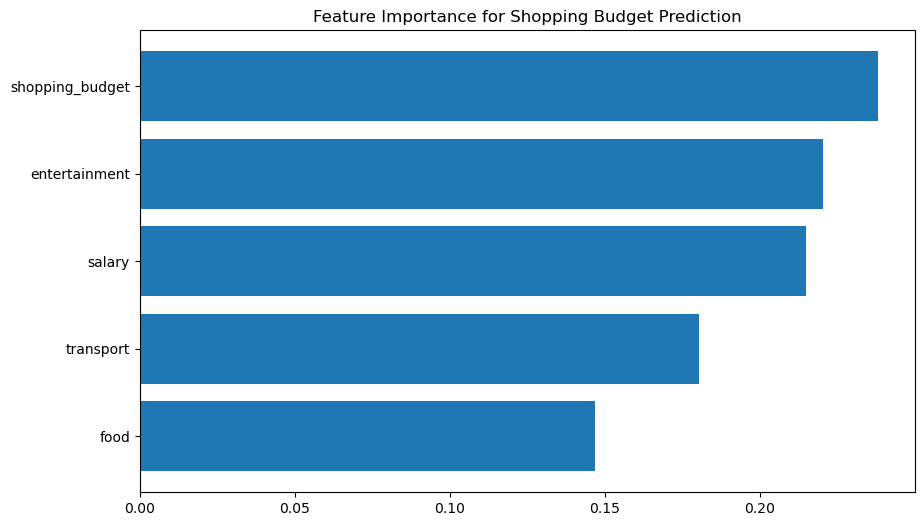


2. Budget Exceeded Prediction for transport:
Logistic Regression - Accuracy: 0.9000
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

Random Forest - Accuracy: 0.8000
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.67      1.00      0.80         4

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



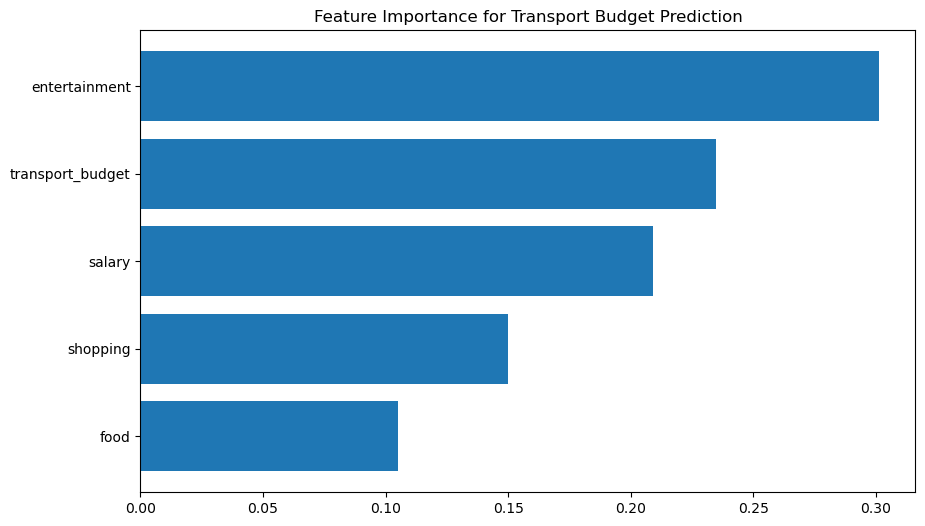


3. Time Series Forecasting Models:
Converting to a sequential index for demonstration.

Entertainment forecast for next 3 periods:
Period 1: $399.20
Period 2: $400.28
Period 3: $400.45

Food forecast for next 3 periods:
Period 1: $356.74
Period 2: $368.38
Period 3: $367.22

Shopping forecast for next 3 periods:
Period 1: $348.25
Period 2: $352.44
Period 3: $352.65

Transport forecast for next 3 periods:
Period 1: $370.22
Period 2: $370.32
Period 3: $370.32

4. Savings Prediction Model (using features: ['entertainment', 'food', 'shopping', 'transport', 'salary', 'entertainment_budget', 'food_budget', 'shopping_budget', 'transport_budget']):
Random Forest - MSE: 58063.40, R²: 0.8216


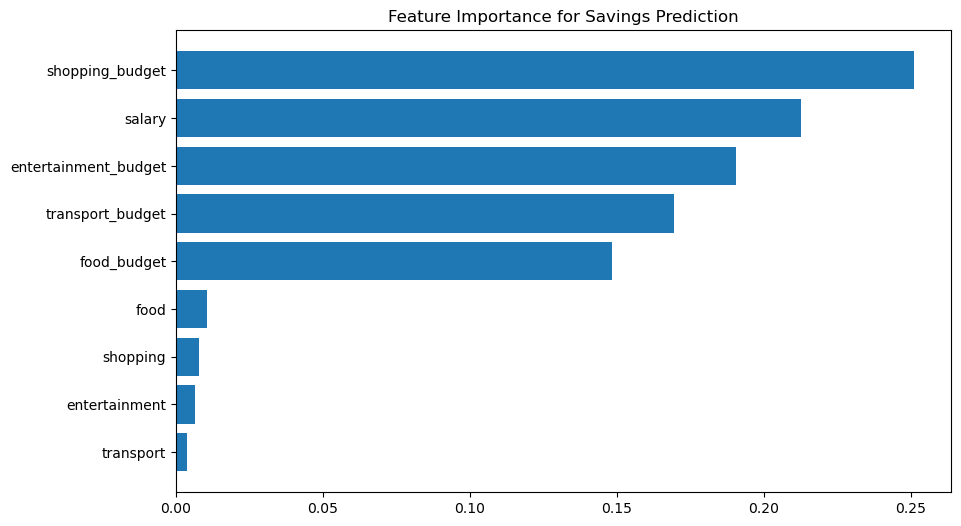

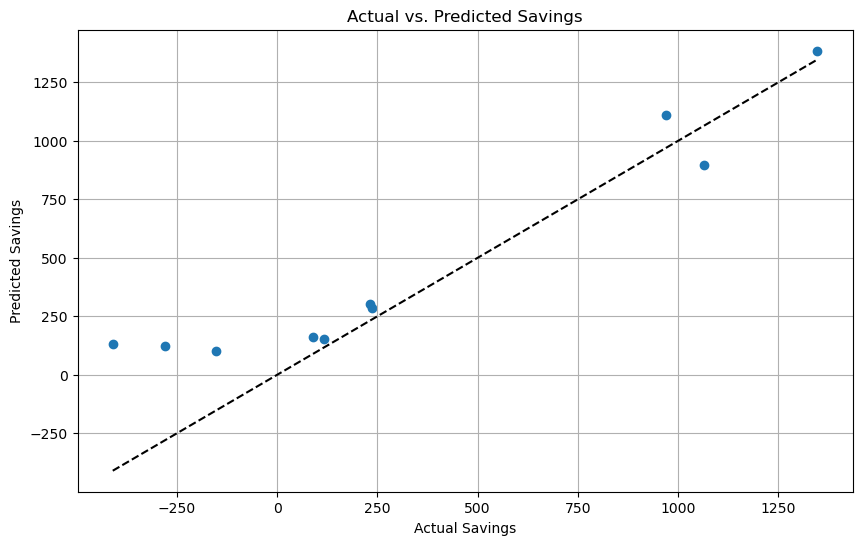

In [28]:
# 4. Predict savings based on spending behaviors
def train_savings_model():
    # Check if all required columns exist
    if 'savings' not in df.columns:
        print("Warning: 'savings' column not found")
        return None
        
    # Determine available features
    possible_features = ['entertainment', 'food', 'shopping', 'transport', 'salary',
                        'entertainment_budget', 'food_budget', 'shopping_budget', 'transport_budget']
    features = [f for f in possible_features if f in df.columns]
    
    if not features:
        print("No valid features for savings prediction")
        return None
    
    print(f"\n4. Savings Prediction Model (using features: {features}):")
    
    X = df[features]
    y = df['savings']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a pipeline with scaling and RF regression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"Random Forest - MSE: {mse:.2f}, R²: {r2:.4f}")
    
    # Feature importance from the RF model
    rf_model = pipeline.named_steps['rf']
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.title('Feature Importance for Savings Prediction')
    plt.show()
    
    # Actual vs. Predicted plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual Savings')
    plt.ylabel('Predicted Savings')
    plt.title('Actual vs. Predicted Savings')
    plt.grid(True)
    plt.show()
    
    return pipeline

# Train all models
print("\nTraining all models...")

spending_model = train_spending_model()
budget_exceeded_models = train_budget_exceeded_models()
forecast_models = train_forecast_models()
savings_model = train_savings_model()


In [23]:
def make_predictions(new_data):
    """
    Make predictions using all trained models
    
    Parameters:
    new_data (dict): Dictionary with all required features
    
    Returns:
    dict: Predictions from all models
    """
    # Convert dict to DataFrame
    new_df = pd.DataFrame([new_data])
    
    # 1. Predict total spending
    spending_features = ['entertainment', 'food', 'shopping', 'transport']
    total_spending_pred = spending_model.predict(new_df[spending_features])[0]
    
    # 2. Predict budget exceeded for each category
    budget_exceeded_preds = {}
    for category, model_info in budget_exceeded_models.items():
        features = model_info['features']
        model = model_info['model']
        scaler = model_info['scaler']
        
        if scaler:
            X = scaler.transform(new_df[features])
        else:
            X = new_df[features]
            
        prediction = model.predict(X)[0]
        probability = model.predict_proba(X)[0][1]  # Probability of exceeding budget
        budget_exceeded_preds[category] = {
            'will_exceed': bool(prediction),
            'probability': probability
        }
    
    # 4. Predict savings
    # Define savings features explicitly instead of trying to extract from model
    savings_features = ['entertainment', 'food', 'shopping', 'transport', 'salary',
                       'entertainment_budget', 'food_budget', 'shopping_budget', 'transport_budget']
    
    # Check if we have all required features
    if all(f in new_data for f in savings_features):
        savings_pred = savings_model.predict(new_df[savings_features])[0]
    else:
        savings_pred = None
        print("Missing required features for savings prediction")
    
    return {
        'predicted_total_spending': total_spending_pred,
        'budget_exceeded_predictions': budget_exceeded_preds,
        'predicted_savings': savings_pred if savings_pred is not None else "Not available"
    }
# Example of how to use the prediction function
# First, extract a real example from the dataset to use as test data
def get_example_data():
    if len(df) > 0:
        # Get the last row as an example
        example = df.iloc[-1].to_dict()
        # Filter out non-feature columns
        example = {k: v for k, v in example.items() 
                   if k in ['entertainment', 'food', 'shopping', 'transport', 'salary',
                           'entertainment_budget', 'food_budget', 'shopping_budget', 'transport_budget']}
        return example
    else:
        return None

example_data = get_example_data()

if example_data:
    print("\nExample prediction using data from your dataset:")
    print(f"Input data: {example_data}")
    predictions = make_predictions(example_data)
    
    if 'predicted_total_spending' in predictions:
        print(f"\nPredicted total spending: ${predictions['predicted_total_spending']:.2f}")
    
    if 'budget_exceeded_predictions' in predictions:
        print("\nBudget exceeded predictions:")
        for category, pred in predictions['budget_exceeded_predictions'].items():
            print(f"{category.capitalize()}: {'Will exceed' if pred['will_exceed'] else 'Will not exceed'} budget (Probability: {pred['probability']:.2f})")
    
    if 'predicted_savings' in predictions:
        print(f"\nPredicted savings: ${predictions['predicted_savings']:.2f}")
else:
    print("\nNo example data available from the dataset")

# Function to improve models with hyperparameter tuning
def improve_models():
    print("\nImproving models with hyperparameter tuning...")
    improved_models = {}
    
    # 1. Improve total spending model if it exists
    if spending_model is not None:
        X = df[['entertainment', 'food', 'shopping', 'transport']]
        y = df['total_spending']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        
        rf = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        
        print(f"\nBest parameters for total spending model: {grid_search.best_params_}")
        best_rf = grid_search.best_estimator_
        best_pred = best_rf.predict(X_test)
        best_mse = mean_squared_error(y_test, best_pred)
        best_r2 = r2_score(y_test, best_pred)
        
        print(f"Improved Random Forest - MSE: {best_mse:.2f}, R²: {best_r2:.4f}")
        improved_models['spending_model'] = best_rf
    
    # 4. Improve savings model if it exists
    if savings_model is not None:
        possible_features = ['entertainment', 'food', 'shopping', 'transport', 'salary',
                           'entertainment_budget', 'food_budget', 'shopping_budget', 'transport_budget']
        features = [f for f in possible_features if f in df.columns]
        
        X = df[features]
        y = df['savings']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestRegressor(random_state=42))
        ])
        
        param_grid = {
            'rf__n_estimators': [50, 100, 200],
            'rf__max_depth': [None, 10, 20],
            'rf__min_samples_split': [2, 5, 10]
        }
        
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        
        print(f"\nBest parameters for savings model: {grid_search.best_params_}")
        best_pipeline = grid_search.best_estimator_
        best_pred = best_pipeline.predict(X_test)
        best_mse = mean_squared_error(y_test, best_pred)
        best_r2 = r2_score(y_test, best_pred)
        
        print(f"Improved Random Forest for savings - MSE: {best_mse:.2f}, R²: {best_r2:.4f}")
        improved_models['savings_model'] = best_pipeline
    
    return improved_models

# Uncomment to run the model improvement code (this can take some time)improved_models = improve_models()


Example prediction using data from your dataset:
Input data: {'entertainment': 392.2982714755614, 'food': 473.4347778854452, 'salary': 2738.765040527631, 'shopping': 263.87396039817224, 'transport': 398.94215448687345, 'entertainment_budget': 273.8765040527631, 'food_budget': 821.6295121582892, 'shopping_budget': 273.8765040527631, 'transport_budget': 547.7530081055262}

Predicted total spending: $1528.55

Budget exceeded predictions:
Entertainment: Will exceed budget (Probability: 0.72)
Food: Will not exceed budget (Probability: 0.00)
Shopping: Will not exceed budget (Probability: 0.50)
Transport: Will not exceed budget (Probability: 0.07)

Predicted savings: $1196.96
